In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
cars = pd.read_csv("C:/Cul 03/Specialization Project/Review II/car_prices.csv")
cars

,Sno,year,make,model,trim,body,transmission,condition,odometer,color,...,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant
0,1,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639,white,...,1,0,0,0,0,0,0,0,0,0
1,2,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393,white,...,1,0,0,0,0,0,0,0,0,0
2,3,2014,BMW,3 Series,328i SULEV,Sedan,automatic,4.5,1331,gray,...,0,0,0,0,0,0,0,0,0,0
3,4,2015,Volvo,S60,T5,Sedan,automatic,4.1,14282,white,...,0,0,0,0,0,0,0,0,0,0
4,5,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,4.3,2641,gray,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,1135,2011,Jaguar,XF,Base,Sedan,automatic,4.1,26431,blue,...,0,0,1,0,0,0,0,0,0,0
2274,1136,2011,Infiniti,G Sedan,G25x,G Sedan,automatic,4.1,20093,gray,...,0,0,1,0,0,0,0,0,0,0
2275,1137,2011,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,4.2,26783,black,...,1,1,1,0,1,0,0,0,0,0
2276,1138,2011,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,3.9,42036,black,...,1,1,1,0,1,0,0,0,0,0


In [3]:
cars.head()

,Sno,year,make,model,trim,body,transmission,condition,odometer,color,...,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant
0,1,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639,white,...,1,0,0,0,0,0,0,0,0,0
1,2,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393,white,...,1,0,0,0,0,0,0,0,0,0
2,3,2014,BMW,3 Series,328i SULEV,Sedan,automatic,4.5,1331,gray,...,0,0,0,0,0,0,0,0,0,0
3,4,2015,Volvo,S60,T5,Sedan,automatic,4.1,14282,white,...,0,0,0,0,0,0,0,0,0,0
4,5,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,4.3,2641,gray,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cars.shape

(2278, 28)

In [5]:
cars.isnull().sum(axis = 0)

Sno                               0
year                              0
make                             10
model                            11
trim                             11
body                             38
transmission                      0
condition                         0
odometer                          0
color                             4
interior                          4
seller                            0
sellingprice                      0
vehicle_type                      0
oil_filter                        0
engine_oil                        0
washer_plug_drain                 0
dust_and_pollen_filter            0
whell_alignment_and_balancing     0
air_clean_filter                  0
fuel_filter                       0
spark_plug                        0
brake_fluid                       0
brake_and_clutch_oil              0
transmission_fluid                0
brake_pads                        0
clutch                            0
coolant                     

In [6]:
data = cars.dropna()

In [7]:
data.isnull().sum(axis = 0)

Sno                              0
year                             0
make                             0
model                            0
trim                             0
body                             0
transmission                     0
condition                        0
odometer                         0
color                            0
interior                         0
seller                           0
sellingprice                     0
vehicle_type                     0
oil_filter                       0
engine_oil                       0
washer_plug_drain                0
dust_and_pollen_filter           0
whell_alignment_and_balancing    0
air_clean_filter                 0
fuel_filter                      0
spark_plug                       0
brake_fluid                      0
brake_and_clutch_oil             0
transmission_fluid               0
brake_pads                       0
clutch                           0
coolant                          0
dtype: int64

### Creating new column 'fault'

In [8]:
# Define a function to assign values to the 'fault' column based on the 'condition' column
def assign_fault(condition):
    if condition < 1.8:
        print(f'Condition: {condition}, Assigned Fault: 0')
        return 0
    else:
        print(f'Condition: {condition}, Assigned Fault: 1')
        return 1

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
data_copy = data.copy()

# Create the 'fault' column using .loc on the copy
data_copy.loc[:, 'fault'] = data_copy['condition'].apply(assign_fault)

data_copy.to_csv("C:/Cul 03/Specialization Project/Review II/car_prices_updated.csv", index=False)



Condition: 5.0, Assigned Fault: 1
Condition: 5.0, Assigned Fault: 1
Condition: 4.5, Assigned Fault: 1
Condition: 4.1, Assigned Fault: 1
Condition: 4.3, Assigned Fault: 1
Condition: 1.0, Assigned Fault: 0
Condition: 3.4, Assigned Fault: 1
Condition: 2.0, Assigned Fault: 1
Condition: 4.2, Assigned Fault: 1
Condition: 3.0, Assigned Fault: 1
Condition: 4.8, Assigned Fault: 1
Condition: 4.8, Assigned Fault: 1
Condition: 2.0, Assigned Fault: 1
Condition: 5.0, Assigned Fault: 1
Condition: 4.4, Assigned Fault: 1
Condition: 2.0, Assigned Fault: 1
Condition: 4.1, Assigned Fault: 1
Condition: 4.9, Assigned Fault: 1
Condition: 1.7, Assigned Fault: 0
Condition: 3.4, Assigned Fault: 1
Condition: 1.9, Assigned Fault: 1
Condition: 2.9, Assigned Fault: 1
Condition: 4.2, Assigned Fault: 1
Condition: 4.9, Assigned Fault: 1
Condition: 3.8, Assigned Fault: 1
Condition: 403.0, Assigned Fault: 1
Condition: 4.2, Assigned Fault: 1
Condition: 4.8, Assigned Fault: 1
Condition: 4.4, Assigned Fault: 1
Condition: 4

In [9]:
# For the data4
# Define a function to assign values to the 'fault' column based on the 'condition' column
def assign_fault(condition):
    if condition < 4:
        print(f'Condition: {condition}, Assigned Fault: 0')
        return 0
    else:
        print(f'Condition: {condition}, Assigned Fault: 1')
        return 1

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
data_copy = data.copy()

# Create the 'fault' column using .loc on the copy
data_copy.loc[:, 'fault'] = data_copy['condition'].apply(assign_fault)

data_copy.to_csv("C:/Cul 03/Specialization Project/Review II/car_prices_updated4.csv", index=False)


Condition: 5.0, Assigned Fault: 1
Condition: 5.0, Assigned Fault: 1
Condition: 4.5, Assigned Fault: 1
Condition: 4.1, Assigned Fault: 1
Condition: 4.3, Assigned Fault: 1
Condition: 1.0, Assigned Fault: 0
Condition: 3.4, Assigned Fault: 0
Condition: 2.0, Assigned Fault: 0
Condition: 4.2, Assigned Fault: 1
Condition: 3.0, Assigned Fault: 0
Condition: 4.8, Assigned Fault: 1
Condition: 4.8, Assigned Fault: 1
Condition: 2.0, Assigned Fault: 0
Condition: 5.0, Assigned Fault: 1
Condition: 4.4, Assigned Fault: 1
Condition: 2.0, Assigned Fault: 0
Condition: 4.1, Assigned Fault: 1
Condition: 4.9, Assigned Fault: 1
Condition: 1.7, Assigned Fault: 0
Condition: 3.4, Assigned Fault: 0
Condition: 1.9, Assigned Fault: 0
Condition: 2.9, Assigned Fault: 0
Condition: 4.2, Assigned Fault: 1
Condition: 4.9, Assigned Fault: 1
Condition: 3.8, Assigned Fault: 0
Condition: 403.0, Assigned Fault: 1
Condition: 4.2, Assigned Fault: 1
Condition: 4.8, Assigned Fault: 1
Condition: 4.4, Assigned Fault: 1
Condition: 4

In [10]:
#opening the second dataset "car_prices_updated"
data2 = pd.read_csv("C:/Cul 03/Specialization Project/Review II/car_prices_updated.csv")

In [11]:
#opening the third dataset "car_prices_updated4"
data4 = pd.read_csv("C:/Cul 03/Specialization Project/Review II/car_prices_updated4.csv")

In [12]:
data2["fault"].value_counts()

1    2180
0      55
Name: fault, dtype: int64

In [13]:
data4["fault"].value_counts()

0    1235
1    1000
Name: fault, dtype: int64

In [41]:
import pandas as pd

data2 = pd.read_csv("C:/Cul 03/Specialization Project/Review II/car_prices_updated.csv")

output_file_path = "C:/Cul 03/Specialization Project/Review II/car_prices_exp4.xlsx"

data2.to_excel(output_file_path, index=False)

print(f"DataFrame exported to {output_file_path}")


DataFrame exported to C:/Cul 03/Specialization Project/Review II/car_prices_exp4.xlsx


In [15]:
data2.head(5)

,Sno,year,make,model,trim,body,transmission,condition,odometer,color,...,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,fault
0,1,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639,white,...,0,0,0,0,0,0,0,0,0,1
1,2,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393,white,...,0,0,0,0,0,0,0,0,0,1
2,3,2014,BMW,3 Series,328i SULEV,Sedan,automatic,4.5,1331,gray,...,0,0,0,0,0,0,0,0,0,1
3,4,2015,Volvo,S60,T5,Sedan,automatic,4.1,14282,white,...,0,0,0,0,0,0,0,0,0,1
4,5,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,4.3,2641,gray,...,0,0,0,0,0,0,0,0,0,1


In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sno                            2235 non-null   int64  
 1   year                           2235 non-null   int64  
 2   make                           2235 non-null   object 
 3   model                          2235 non-null   object 
 4   trim                           2235 non-null   object 
 5   body                           2235 non-null   object 
 6   transmission                   2235 non-null   object 
 7   condition                      2235 non-null   float64
 8   odometer                       2235 non-null   int64  
 9   color                          2235 non-null   object 
 10  interior                       2235 non-null   object 
 11  seller                         2235 non-null   object 
 12  sellingprice                   2235 non-null   i

In [17]:
data2.isnull().sum(axis = 0)

Sno                              0
year                             0
make                             0
model                            0
trim                             0
body                             0
transmission                     0
condition                        0
odometer                         0
color                            0
interior                         0
seller                           0
sellingprice                     0
vehicle_type                     0
oil_filter                       0
engine_oil                       0
washer_plug_drain                0
dust_and_pollen_filter           0
whell_alignment_and_balancing    0
air_clean_filter                 0
fuel_filter                      0
spark_plug                       0
brake_fluid                      0
brake_and_clutch_oil             0
transmission_fluid               0
brake_pads                       0
clutch                           0
coolant                          0
fault               

In [39]:
#data4.isnull().sum(axis = 0)

In [42]:
data2 = pd.read_csv("C:/Cul 03/Specialization Project/Review II/car_prices_updated.csv")

# Specify the columns you want to include in the new dataset
selected_columns = [
    'Sno',
    'oil_filter',
    'engine_oil',
    'washer_plug_drain',
    'dust_and_pollen_filter',
    'whell_alignment_and_balancing',
    'air_clean_filter',
    'fuel_filter',
    'spark_plug',
    'brake_fluid',
    'brake_and_clutch_oil',
    'transmission_fluid',
    'brake_pads',
    'clutch',
    'coolant',
    'fault',
]

# Create a new DataFrame with the selected columns
features_data = data2[selected_columns]

# Print the new DataFrame
print(features_data)

# Export the new DataFrame to Excel
features_data.to_excel('C:/Cul 03/Specialization Project/Review II/features_data.xlsx', index=False)


       Sno  oil_filter  engine_oil  washer_plug_drain  dust_and_pollen_filter  \
0        1           1           1                  0                       0   
1        2           1           1                  0                       0   
2        3           1           1                  0                       0   
3        4           1           1                  0                       0   
4        5           1           1                  0                       0   
...    ...         ...         ...                ...                     ...   
2230  1135           1           1                  1                       1   
2231  1136           1           1                  1                       1   
2232  1137           1           1                  1                       0   
2233  1138           1           1                  1                       0   
2234  1139           1           1                  1                       1   

      whell_alignment_and_b

In [43]:
data4 = pd.read_csv("C:/Cul 03/Specialization Project/Review II/car_prices_updated4.csv")

# Specify the columns you want to include in the new dataset
selected_columns = [
    'Sno',
    'oil_filter',
    'engine_oil',
    'washer_plug_drain',
    'dust_and_pollen_filter',
    'whell_alignment_and_balancing',
    'air_clean_filter',
    'fuel_filter',
    'spark_plug',
    'brake_fluid',
    'brake_and_clutch_oil',
    'transmission_fluid',
    'brake_pads',
    'clutch',
    'coolant',
    'fault',
]

# Create a new DataFrame with the selected columns
features_data4 = data4[selected_columns]

# Print the new DataFrame
print(features_data4)

# Export the new DataFrame to Excel (optional)
features_data4.to_excel('C:/Cul 03/Specialization Project/Review II/features_data4.xlsx', index=False)


       Sno  oil_filter  engine_oil  washer_plug_drain  dust_and_pollen_filter  \
0        1           1           1                  0                       0   
1        2           1           1                  0                       0   
2        3           1           1                  0                       0   
3        4           1           1                  0                       0   
4        5           1           1                  0                       0   
...    ...         ...         ...                ...                     ...   
2230  1135           1           1                  1                       1   
2231  1136           1           1                  1                       1   
2232  1137           1           1                  1                       0   
2233  1138           1           1                  1                       0   
2234  1139           1           1                  1                       1   

      whell_alignment_and_b

In [45]:
features_data.head()

,Sno,oil_filter,engine_oil,washer_plug_drain,dust_and_pollen_filter,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,fault
0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
#features_data.info()

In [47]:
#features_data.isnull().sum(axis = 0)

In [48]:
features_data4["fault"].value_counts()

0    1235
1    1000
Name: fault, dtype: int64

### Predictions

### KNeighborsClassifier

In [53]:
#KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


# Define the features (X) and the target variable (y)
features = features_data.drop(['Sno', 'fault'], axis=1)
target = features_data['fault']

# Manually select 14 features based on the analysis
selected_features = [
    'oil_filter', 'engine_oil', 'washer_plug_drain', 'dust_and_pollen_filter',
    'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
    'spark_plug', 'brake_fluid', 'brake_and_clutch_oil', 'transmission_fluid',
    'brake_pads', 'clutch', 'coolant',
]

# Select only the relevant features
selected_features_df = features_data[selected_features]

# Convert the target variable to numerical format using Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, target_encoded, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=9)  

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_encoded = knn_classifier.predict(X_test)

# Decode the predictions
y_pred_decoded = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_encoded)
classification_rep = classification_report(y_test, y_pred_encoded)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.98      1.00      0.99       437

    accuracy                           0.98       447
   macro avg       0.49      0.50      0.49       447
weighted avg       0.96      0.98      0.97       447



C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are il

In [50]:
#prediction using KNeighborsClassifier
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'selected_features' is the list of selected features for analysis
selected_features = [
    'oil_filter', 'engine_oil', 'washer_plug_drain', 'dust_and_pollen_filter',
    'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
    'spark_plug', 'brake_fluid', 'brake_and_clutch_oil', 'transmission_fluid',
    'brake_pads', 'clutch', 'coolant',
    'fault',
]

# Select only the relevant features
selected_features_df = features_data4[selected_features]

input_data = {
    'oil_filter': [0],
    'engine_oil': [0],
    'washer_plug_drain': [0],
    'dust_and_pollen_filter': [0],
    'whell_alignment_and_balancing': [0],
    'air_clean_filter': [0],
    'fuel_filter': [0],
    'spark_plug': [0],
    'brake_fluid': [0],
    'brake_and_clutch_oil': [0],
    'transmission_fluid': [0],
    'brake_pads': [0],
    'clutch': [0],
    'coolant': [0],
}

# Create a DataFrame for the input data
input_df = pd.DataFrame(input_data)

# Extract the selected features from the input data
input_features = input_df[selected_features[:-1]]  # Exclude the 'fault' column

# Convert the target variable to numerical format using Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(selected_features_df['fault'])

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model on the entire dataset
knn_classifier.fit(selected_features_df[selected_features[:-1]], target_encoded)

# Make predictions for the input data
prediction_encoded = knn_classifier.predict(input_features)

# Decode the predictions
prediction_decoded = label_encoder.inverse_transform(prediction_encoded)

# Print the final prediction
if prediction_decoded[0] == 1:
    print("The car is not faulty.")
else:
    print("The car is faulty.")


The car is not faulty.


C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### To predict the fault

In [51]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'features_data4' is your DataFrame
# Assuming 'selected_features' is the list of selected features for analysis
selected_features = [
    'oil_filter', 'engine_oil', 'washer_plug_drain', 'dust_and_pollen_filter',
    'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
    'spark_plug', 'brake_fluid', 'brake_and_clutch_oil', 'transmission_fluid',
    'brake_pads', 'clutch', 'coolant',
    'fault',
]

# Select only the relevant features
selected_features_df = features_data4[selected_features]

# Create a dictionary to store user input
input_data = {}
for feature in selected_features[:-1]:  # Exclude the 'fault' column
    while True:
        user_input = input(f"Enter the value for {feature} (0 or 1): ")
        if user_input in {'0', '1'}:
            input_data[feature] = [float(user_input)]  # Assuming the input values are numeric
            break
        else:
            print("Invalid input. Please enter either 0 or 1.")

# Create a DataFrame for the input data
input_df = pd.DataFrame(input_data)

# Extract the selected features from the input data
input_features = input_df[selected_features[:-1]]  # Exclude the 'fault' column

# Convert the target variable to numerical format using Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(selected_features_df['fault'])

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model on the entire dataset
knn_classifier.fit(selected_features_df[selected_features[:-1]], target_encoded)

# Make predictions for the input data
prediction_encoded = knn_classifier.predict(input_features)

# Decode the predictions
prediction_decoded = label_encoder.inverse_transform(prediction_encoded)

# Print the final prediction
if prediction_decoded[0] == 1:
    print("The car is not faulty.")
else:
    print("The car is faulty.")


Enter the value for oil_filter (0 or 1): 1
Enter the value for engine_oil (0 or 1): 1
Enter the value for washer_plug_drain (0 or 1): 1
Enter the value for dust_and_pollen_filter (0 or 1): 1
Enter the value for whell_alignment_and_balancing (0 or 1): 1
Enter the value for air_clean_filter (0 or 1): 1
Enter the value for fuel_filter (0 or 1): 1
Enter the value for spark_plug (0 or 1): 1
Enter the value for brake_fluid (0 or 1): 1
Enter the value for brake_and_clutch_oil (0 or 1): 1
Enter the value for transmission_fluid (0 or 1): 1
Enter the value for brake_pads (0 or 1): 1
Enter the value for clutch (0 or 1): 1
Enter the value for coolant (0 or 1): 1
The car is faulty.


C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'features_data4' is your DataFrame
# Assuming 'selected_features' is the list of selected features for analysis
selected_features = [
    'oil_filter', 'engine_oil', 'washer_plug_drain', 'dust_and_pollen_filter',
    'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
    'spark_plug', 'brake_fluid', 'brake_and_clutch_oil', 'transmission_fluid',
    'brake_pads', 'clutch', 'coolant',
    'fault',
]

# Select only the relevant features
selected_features_df = features_data4[selected_features]

# Create a dictionary to store user input
input_data = {}
for feature in selected_features[:-1]:  # Exclude the 'fault' column
    while True:
        user_input = input(f"Enter the value for {feature} (0 or 1): ")
        if user_input in {'0', '1'}:
            input_data[feature] = [float(user_input)]  # Assuming the input values are numeric
            break
        else:
            print("Invalid input. Please enter either 0 or 1.")

# Create a DataFrame for the input data
input_df = pd.DataFrame(input_data)

# Extract the selected features from the input data
input_features = input_df[selected_features[:-1]]  # Exclude the 'fault' column

# Convert the target variable to numerical format using Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(selected_features_df['fault'])

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model on the entire dataset
knn_classifier.fit(selected_features_df[selected_features[:-1]], target_encoded)

# Make predictions for the input data
prediction_encoded = knn_classifier.predict(input_features)

# Decode the predictions
prediction_decoded = label_encoder.inverse_transform(prediction_encoded)

# Print the final prediction
if prediction_decoded[0] == 1:
    print("The car is not faulty.")
else:
    print("The car is faulty.")


Enter the value for oil_filter (0 or 1): 0
Enter the value for engine_oil (0 or 1): 0
Enter the value for washer_plug_drain (0 or 1): 0
Enter the value for dust_and_pollen_filter (0 or 1): 0
Enter the value for whell_alignment_and_balancing (0 or 1): 0
Enter the value for air_clean_filter (0 or 1): 0
Enter the value for fuel_filter (0 or 1): 0
Enter the value for spark_plug (0 or 1): 0
Enter the value for brake_fluid (0 or 1): 0
Enter the value for brake_and_clutch_oil (0 or 1): 0
Enter the value for transmission_fluid (0 or 1): 0
Enter the value for brake_pads (0 or 1): 0
Enter the value for clutch (0 or 1): 0
Enter the value for coolant (0 or 1): 0
The car is not faulty.


C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


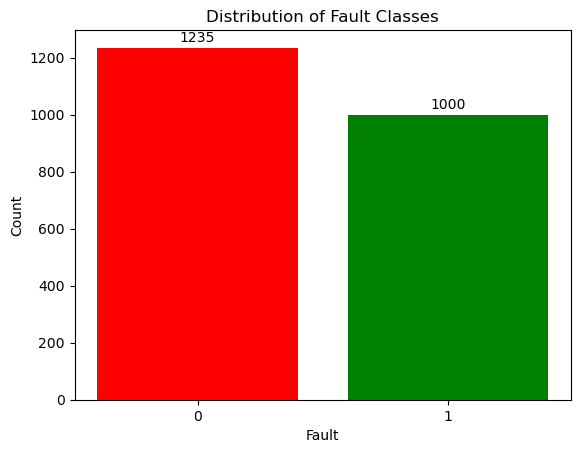

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'features_data4' is your DataFrame
# Assuming 'fault' is your target variable

# Count the occurrences of each class in the 'fault' column
class_counts = features_data4['fault'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values, color=['red', 'green'])

# Set the x-axis ticks to display only '0' and '1'
plt.xticks(class_counts.index, ['0', '1'])

# Add labels and title
plt.xlabel('Fault')
plt.ylabel('Count')
plt.title('Distribution of Fault Classes')

# Add annotations
for i, count in enumerate(class_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


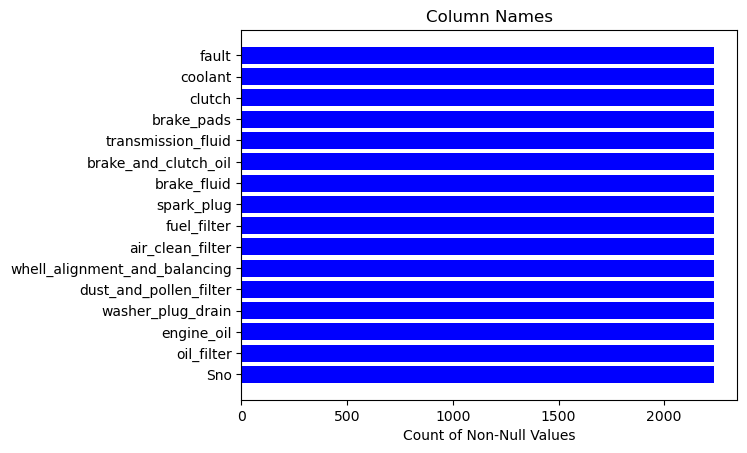

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'features_data4' is your DataFrame

# Count the non-null values in each column
column_counts = features_data4.count()

# Create a horizontal bar chart
plt.barh(column_counts.index, column_counts.values, color='blue')

# Add labels and title
plt.xlabel('Count of Non-Null Values')
plt.title('Column Names')

# Show the plot
plt.show()


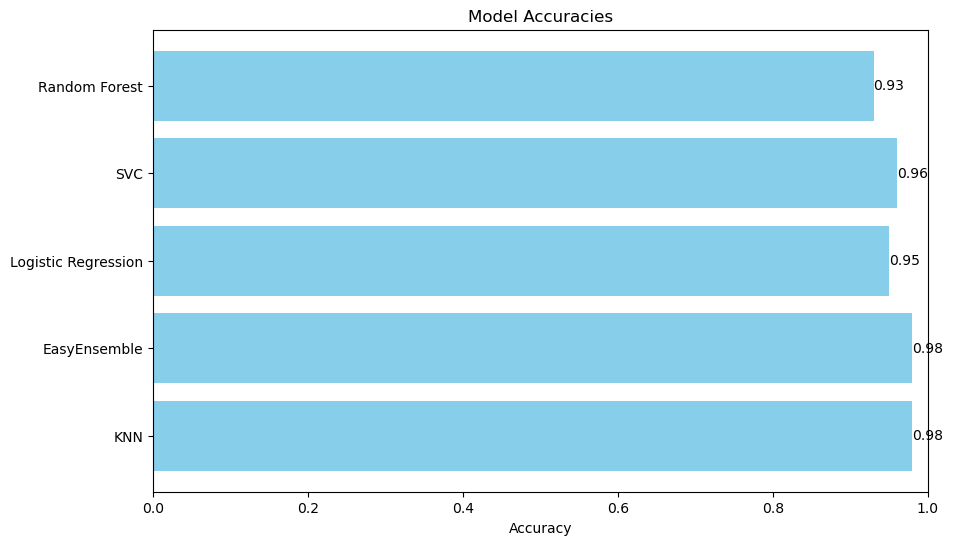

In [34]:
import matplotlib.pyplot as plt
import numpy as np

models = ['KNN', 'EasyEnsemble', 'Logistic Regression', 'SVC', 'Random Forest']
accuracies = [0.98, 0.98, 0.95, 0.96, 0.93]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy values between 0 and 1

# Add accuracy values on each bar
for i, acc in enumerate(accuracies):
    plt.text(acc, i, f'{acc:.2f}', va='center')

plt.show()


### Hyperparameter tuning

In [35]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the features (X) and the target variable (y)
features = features_data.drop(['Sno', 'fault'], axis=1)
target = features_data['fault']

# Manually select 14 features based on your domain knowledge or analysis
selected_features = [
    'oil_filter', 'engine_oil', 'washer_plug_drain', 'dust_and_pollen_filter',
    'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
    'spark_plug', 'brake_fluid', 'brake_and_clutch_oil', 'transmission_fluid',
    'brake_pads', 'clutch', 'coolant',
]

# Select only the relevant features
selected_features_df = features_data[selected_features]

# Convert the target variable to numerical format using Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, target_encoded, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
hyperparameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33],
    'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'p': [1, 2]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {:}".format(best_params))

# Train the model with the best hyperparameters
knn_classifier = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], leaf_size=best_params['leaf_size'], p=best_params['p'])
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_encoded = knn_classifier.predict(X_test)

# Decode the predictions
y_pred_decoded = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_decoded)
classification_report = classification_report(y_test, y_pred_decoded)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report)

C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Best score: 0.97
Best parameters: {'leaf_size': 5, 'n_neighbors': 5, 'p': 1}
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.98      1.00      0.99       437

    accuracy                           0.98       447
   macro avg       0.49      0.50      0.49       447
weighted avg       0.96      0.98      0.97       447



C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CHARAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd